<a href="https://colab.research.google.com/github/settysurekha21/Customer_segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation - Agglomerative Hierarchical Clustering**

---



**Description**

The "Customer Segmentation using Agglomerative Hierarchical Clustering" project is a machine learning initiative focused on the in-depth analysis and categorization of customers based on their behavior, preferences, and attributes. By utilizing data such as demographic information, purchase history, and website interactions, the project aims to uncover distinct customer segments within a dataset. Customer segmentation is a critical strategy for businesses seeking to enhance marketing campaigns, improve customer satisfaction, and optimize product offerings. This project will involve data preprocessing to clean and prepare the data, followed by the application of agglomerative hierarchical clustering techniques to group customers into meaningful clusters. The choice of appropriate distance metrics and linkage methods will be pivotal in the clustering process. Upon segmenting the customers, the project will delve into cluster analysis to understand the unique characteristics of each group, visualize the clusters, and calculate key statistics. The end goal is to provide actionable recommendations for tailored marketing strategies, including product recommendations, advertising channels, and promotional offers, tailored to each customer segment. Ultimately, this project will empower businesses with the insights necessary to enhance customer engagement and drive business growth.






**Dataset Description: Mall Customer Dataset**

The "Mall Customer Dataset" is a comprehensive dataset designed to capture key attributes and behavior of customers who visit a shopping mall. This dataset serves as a valuable resource for businesses and analysts seeking to gain insights into customer demographics and spending habits. It consists of four primary features:

**1. Gender:**This categorical feature records the gender of each customer, distinguishing between male and female shoppers. Gender can be an essential variable for understanding buying patterns and preferences.

**2. Age:** Age is a numerical attribute representing the customer's age. Understanding the age distribution of mall visitors can help in tailoring marketing campaigns and product offerings to different age groups.

**3. Annual Income (in USD):** This numerical feature provides insights into the financial capacity of customers, indicating their annual income. Income levels often influence spending behavior and the types of products or services individuals can afford.

**4. Spending Score:** The spending score is a numerical attribute that quantifies a customer's spending behavior within the mall. It is typically derived from customer purchase data, loyalty program activity, or surveys. A higher spending score indicates more frequent and substantial purchases.

**DataSet Link:**  https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



**Import the libraries**

In [1]:
# Importing the libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

**Importing the dataset**


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

**Extracting the matrix of features**

In [4]:
x = dataset.iloc[:, [3, 4]].values

**Finding the optimal number of clusters using the Dendrogram**

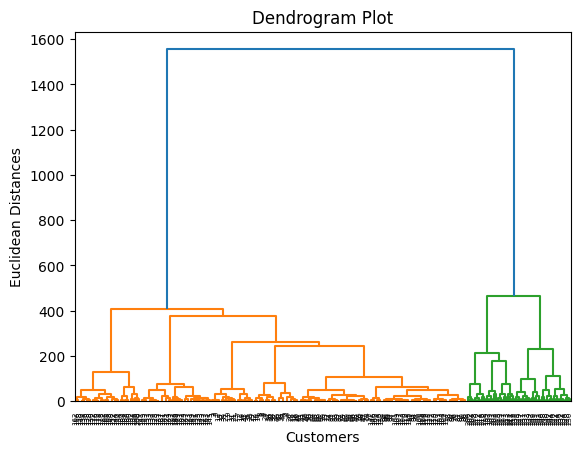

In [11]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
mtp.title("Dendrogram Plot")
mtp.ylabel("Euclidean Distances")
mtp.xlabel("Customers")
mtp.show()

**Training the hierarchical clustering model**

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Visualizing the clusters**

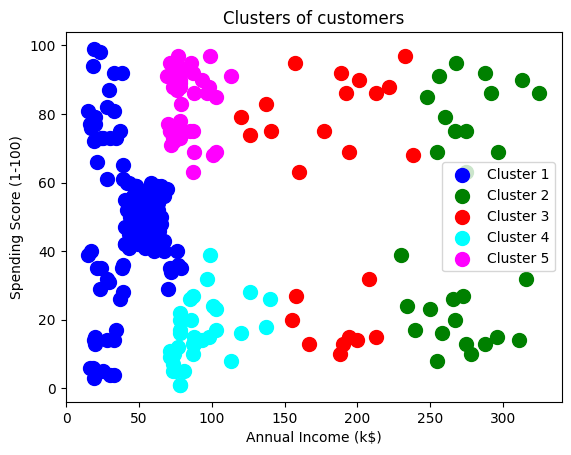

In [7]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

**Analyze the results and segment profiles**

In [10]:
dataset['Cluster'] = y_pred
segment_profiles = dataset.groupby('Cluster').mean()
print(segment_profiles)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         65.596899  40.178295           45.550388               49.131783
1        236.392857  37.714286          273.428571               48.285714
2        210.375000  35.458333          182.208333               57.458333
3        167.303030  41.060606           90.939394               15.909091
4        159.000000  32.722222           83.111111               82.416667


<ipython-input-10-f829b31298b2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_profiles = dataset.groupby('Cluster').mean()
